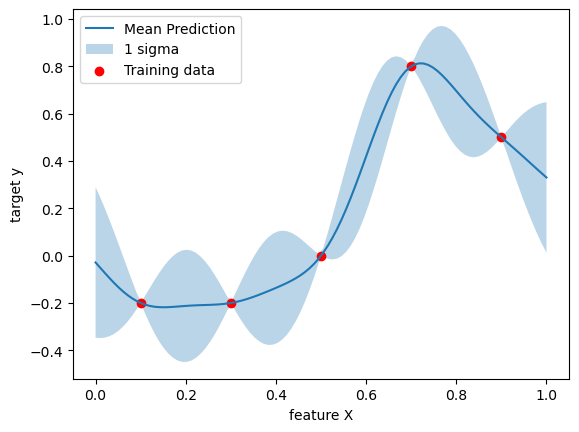

Kernel after fit: RBF(length_scale=0.1)
Length scale used: 0.10000000000000002


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.preprocessing import StandardScaler

# data set
X = np.array([0.3, 0.7, 0.9, 0.1, 0.5]).reshape(-1,1)
y = np.array([-0.2, 0.8, 0.5, -0.2, 0.0])

X_test = np.linspace(0, 1, 100).reshape(-1, 1)

scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.reshape(-1,1))

kernel = RBF(length_scale=0.1)

gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer=None)
gp.fit(X, y_scaled)
y_pred_scaled, y_sigma_scaled = gp.predict(X_test, return_std=True)

y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_sigma = y_sigma_scaled * scaler.scale_[0]  

plt.figure()
plt.plot(X_test, y_pred, label="Mean Prediction")
plt.fill_between(X_test.ravel(), y_pred - y_sigma, y_pred + y_sigma, alpha=0.3, label="1 sigma")
plt.scatter(X, y, c='r', label="Training data")
plt.legend()
plt.xlabel('feature X')
plt.ylabel('target y')
plt.show()

print("Kernel after fit:", gp.kernel_)
print("Length scale used:", gp.kernel_.length_scale)


